<a href="https://colab.research.google.com/github/kritika-gupta/IE406-machine-learning/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Understanding Bias and Variance


Let f(x) = x + 2 * sin (1.5 * x) be your true function. Compute the data points where i = 1 to ((2*pi)/(1.5*1000)))*k  (where k is any natural number) by adding  noise samples drawn from Gaussian distribution with mean 0 and variance 2 to  the true function.


In [ ]:
k = 2
x_max = ((2*np.pi)/(1.5))*k
x = (np.arange(1, x_max, 0.01)).reshape(-1, 1)
print(len(x))
X_scaled = (x - np.mean(x))/np.std(x)
X_ = np.concatenate((np.ones((X_scaled.shape[0], 1)), X_scaled), axis=1)

# true function
f = lambda x: x + 2*np.sin(1.5*x)

738


Take a simple (e.g. linear) hypothesis (model) to find a fit for estimating the above true function using mean squared error as criterion. Calculate both bias and variance to understand  the  concept of  underfitting  in ML.   Choose the number of experiments to be 1000 in order to compute the expectation.


1.8426486360493248 1.8426486360493246
Bias = 1.1870643902890983
Variance = 0.010819753417800775


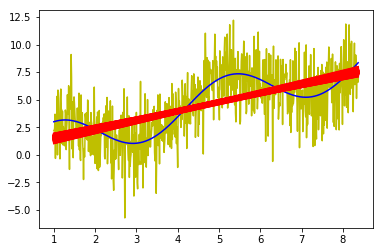

In [ ]:
# simple linear hypothesis : theta0 + theta1*x
# 1000 experiments
num_exps = 1000
samples = x.shape[0]
y_pred = np.zeros((samples, num_exps))
for exp in range(num_exps):
    noise = np.random.normal(0, 2, size=(len(x), 1))
    y = f(x).reshape(-1, 1) + noise
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_.T, X_)), X_.T), y)
    y_pred[:, exp:exp+1] = X_@theta

y_est = np.mean(y_pred, axis = 1).reshape(-1, 1)
bias = abs(f(x) - y_est)
variance = np.mean(((y_pred - y_est)**2), axis = 1)
mse = np.mean(((f(x) - y_pred)**2), axis=1)

print(np.mean((bias)**2 + variance), np.mean(mse))
print("Bias =", np.mean(bias))
print("Variance =", np.mean(variance))
plt.plot(x, y, 'y')
plt.plot(x, f(x), 'b')
plt.plot(x, y_pred, 'r')
plt.show()

Now take a complex (e.g. higher order polynomial) hypothesis and repeat the above experiment to understand overfitting in ML.

In [ ]:
# complex linear hypothesis : theta0 + theta1*x + theta2*x**2 + theta3*x**3 + theta4*x**4 + theta5*x**5
# 1000 experiments

x2 = (np.arange(1, x_max, 0.01)).reshape(-1, 1)
x2_ = np.concatenate((x2, x2**2, x2**3, x2**4, x2**5), axis = 1)
print(np.std(x2_, axis = 0).shape)

X2_scaled = (x2_ - np.mean(x2_, axis = 0))/np.std(x2_, axis = 0)
print(X2_scaled.shape)
X2_ = np.concatenate((np.ones((X2_scaled.shape[0], 1)), X2_scaled), axis=1)
print(X2_.shape)

(5,)
(738, 5)
(738, 6)


Plot the true function and the expectation of estimated function for 1 and 2 above.  Verify the equation MSE = Bias^2 + Variance for both.


0.18870178068438462 0.18870178068438465
Bias = 0.33676245221178147
Variance = 0.033046664821220754


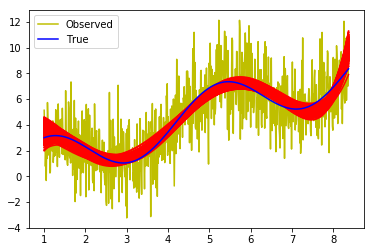

In [ ]:
num_exps = 1000
samples = X2_.shape[0]
y_pred = np.zeros((samples, num_exps))
for exp in range(num_exps):
    noise = np.random.normal(0, 2, size=(samples, 1))
    y = f(x2) + noise
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X2_.T, X2_)), X2_.T), y)
    y_pred[:, exp:exp+1] = X2_@theta

y_est = np.mean(y_pred, axis = 1).reshape(-1, 1)
bias = abs(f(x2) - y_est)
variance = np.mean(((y_pred - y_est)**2), axis = 1)
mse = np.mean(((f(x2) - y_pred)**2), axis=1)

print(np.mean((bias)**2 + variance), np.mean(mse))
print("Bias =", np.mean(bias))
print("Variance =", np.mean(variance))
plt.plot(x2, y, 'y', label = "Observed")
plt.plot(x2, y_pred, 'r')
plt.plot(x2, f(x2), 'b', label = "True")
plt.legend(loc = 0)
plt.show()